# Frequency of Storms

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

/home/lucia/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Counts

In [2]:
subset_trainvalid = pd.read_pickle('./dfs/subset_trainvalid')
subset_test = pd.read_pickle('./dfs/subset_test')

In [3]:
features = ['EVENT_CATEGORY', 'BEGIN_YEAR', 'STATE']
df_trainvalid = subset_trainvalid.loc[:,features]
df_test = subset_test.loc[:,features]
#feat_cat = ['EVENT_CATEGORY', 'BEGIN_YEAR', 'STATE']
#for item in feat_cat:
#    df_trainvalid[item] = df_trainvalid[item].astype('category')
#    df_test[item] = df_test[item].astype('category')

In [4]:
df = df_trainvalid
df = df.groupby(['BEGIN_YEAR','STATE','EVENT_CATEGORY']).size()
df = df.reset_index()
df.rename(columns = {0 : 'COUNT'}, inplace=True)
df.head()

,BEGIN_YEAR,STATE,EVENT_CATEGORY,COUNT
0,1996,alabama,Flood,32
1,1996,alabama,Heat,55
2,1996,alabama,Storm,266
3,1996,alabama,Tornado,49
4,1996,alabama,Wind,328


In [5]:
# Top states in terms of number of storms in 2011
sel = df[ (df.BEGIN_YEAR == 2011) & (df.EVENT_CATEGORY == 'Storm')][['STATE','COUNT']]
sel.sort_values(by='COUNT', ascending=False)[:8]

,STATE,COUNT
4778,kansas,1395
4948,texas,1243
4832,missouri,1162
4844,nebraska,914
4900,oklahoma,866
4760,illinois,793
4894,ohio,687
4772,iowa,662


In [6]:
areadf = pd.read_csv("./data/state_areas.csv", 
                    dtype = {'AREA' : float, 'STATE' : str})
areadf.STATE = areadf.STATE.str.lower()
merged = pd.merge(df,areadf,on='STATE')
merged['COUNT_PER_AREA'] = 1000.0*merged.COUNT/merged.AREA
print merged.head(2)

   BEGIN_YEAR    STATE EVENT_CATEGORY  COUNT     AREA  COUNT_PER_AREA
0        1996  alabama          Flood     32  52420.0        0.610454
1        1996  alabama           Heat     55  52420.0        1.049218


In [7]:
# Test printing: number of storms per area in 2011
selprint = merged[(merged.EVENT_CATEGORY == 'Storm') & (merged.BEGIN_YEAR == 2011)]
selprint = selprint[['STATE','COUNT_PER_AREA']]
for index, row in selprint.iterrows():
    row_string = '[\'' + str(row['STATE']) +'\',' + str(row['COUNT_PER_AREA']) + '],'
    print row_string

['alabama',7.30637161389],
['alaska',0.297572529547],
['arizona',0.508816562856],
['arkansas',11.2450403355],
['california',0.934665078347],
['colorado',5.36053951236],
['connecticut',12.9893559444],
['delaware',7.63358778626],
['district of columbia',44.1176470588],
['florida',4.09075701816],
['georgia',9.91165334455],
['hawaii',9.23893157702],
['idaho',0.347018631311],
['illinois',13.692716787],
['indiana',13.0422844591],
['iowa',11.7640786878],
['kansas',16.9547145045],
['kentucky',12.2500494951],
['louisiana',4.73481232579],
['maine',4.63538722442],
['maryland',14.3478961793],
['massachusetts',14.9706272503],
['michigan',3.5051802221],
['minnesota',6.13094690347],
['mississippi',8.91972249752],
['missouri',16.669774915],
['montana',2.99238302503],
['nebraska',11.8167244143],
['nevada',0.162789856383],
['new hampshire',7.70135843406],
['new jersey',18.2276739654],
['new mexico',0.411218027798],
['new york',10.741453579],
['north carolina',9.79208086364],
['north dakota',6.1104981753

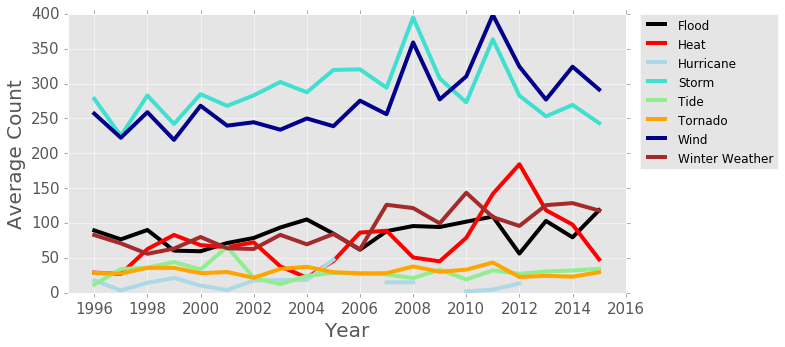

In [8]:
# Plot average number of storms as a function of year (across US)
df = df.loc[df.EVENT_CATEGORY != 'Other',:]
df_bycat = df.groupby(['EVENT_CATEGORY','BEGIN_YEAR']).mean()['COUNT'].reset_index()
df_bycat = df_bycat.pivot(index ='BEGIN_YEAR', columns='EVENT_CATEGORY')['COUNT']
colors = ['black','red','lightblue','turquoise','lightgreen','orange','darkblue', 'brown']
plt.figure(figsize=(10,5))
#df_bycat.plot(title="Storm Count By Year", lw =4, color=colors)
#byf_bycat.plot(title="Storm Count By Year", lw =4, colormap='jet')
i= 0
for storm in df_bycat.columns.values:
    plt.plot(df_bycat.index.values, df_bycat[storm], lw =4, color = colors[i] )
    i +=1
plt.xlabel("Year", fontsize=20)
plt.ylabel("Average Count", fontsize = 20)
#plt.title("Storm Count By Year", fontsize = 25)
#plt.xlim(0.0,1.0)
#plt.ylim(0.0,1.0)
plt.xticks(np.arange(1996, 2017, 2), fontsize=15)
plt.yticks(fontsize=15)
lgd = plt.legend(bbox_to_anchor=(1.025, 1), loc=2, borderaxespad=0.)
#plt.gca().tight_layout()
plt.savefig("./figs/stormcountyear.png", bbox_extra_artist=[lgd])
plt.show()

In [9]:
# No Hurricane events in 2006
print df[(df.BEGIN_YEAR == 2006) & (df.EVENT_CATEGORY == 'Hurricane') ]

Empty DataFrame
Columns: [BEGIN_YEAR, STATE, EVENT_CATEGORY, COUNT]
Index: []


In [10]:
# Average number of a given storm event per state per year
df_bystate = df.groupby(['STATE','EVENT_CATEGORY']).mean()["COUNT"]
df_bystate = df_bystate.reset_index()
print df_bystate.head()
df_bystate.to_csv("./dfs/avestormcounts.csv", index = False)

     STATE EVENT_CATEGORY   COUNT
0  alabama          Flood   86.25
1  alabama           Heat   93.15
2  alabama      Hurricane    9.60
3  alabama          Storm  276.40
4  alabama           Tide    1.20
